In [59]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #adjust configuration of the plot we create

df=pd.read_csv(r'D:\IT\DataAnalysis\moviesver1.csv', encoding='unicode_escape') #reading data



In [32]:
#display data
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986


In [33]:
#see if have any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
writer - 0.0%
year - 0.0%


In [60]:
#data type of columns

df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

In [35]:
#change data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [12]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [36]:
df['yearcorrect']=df['released'].astype(str).str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,2016-07-13,127,7.0,Bryan Cranston,Ellen Sue Brown,2016,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,2016-01-22,102,6.0,Robert De Niro,John Phillips,2016,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,2016-09-23,87,6.8,Andy Samberg,Nicholas Stoller,2016,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,2016-06-17,107,6.3,Dwayne Johnson,Ike Barinholtz,2016,2016


In [41]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,Zentropa Entertainments,Denmark,Kristian Levring,Drama,5000,La salvación,R,2015-02-27,92,6.7,Mads Mikkelsen,Anders Thomas Jensen,2014,2015
1074,0,Balboa Entertainment,Denmark,Nicolas Winding Refn,Crime,4440,Pusher,NOT RATED,1996-08-30,105,7.4,Kim Bodnia,Jens Dahl,1996,1996
2311,47000000,Pan Européenne,Belgium,Jaco Van Dormael,Drama,3600,Mr. Nobody,R,2013-09-26,141,7.9,Jared Leto,Jaco Van Dormael,2009,2013
1466,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Feroz,UNRATED,2001-05-18,108,6.8,Emily Perkins,Karen Walton,2000,2001


In [40]:
pd.set_option('display.max_rows',None) #limit number of rows data

In [42]:
#drop duplicate data
df['company'].drop_duplicates().sort_values(ascending=False)

2422                         micro_scope
1233         Zucker Brothers Productions
1299             Zentropa Entertainments
184                 Zenith Entertainment
2191                     Zazen Produções
                      ...               
1682                        2 Loop Films
2894    1984 Private Defense Contractors
1071                       1492 Pictures
1608                           120 Films
1789     "DIA" Productions GmbH & Co. KG
Name: company, Length: 897, dtype: object

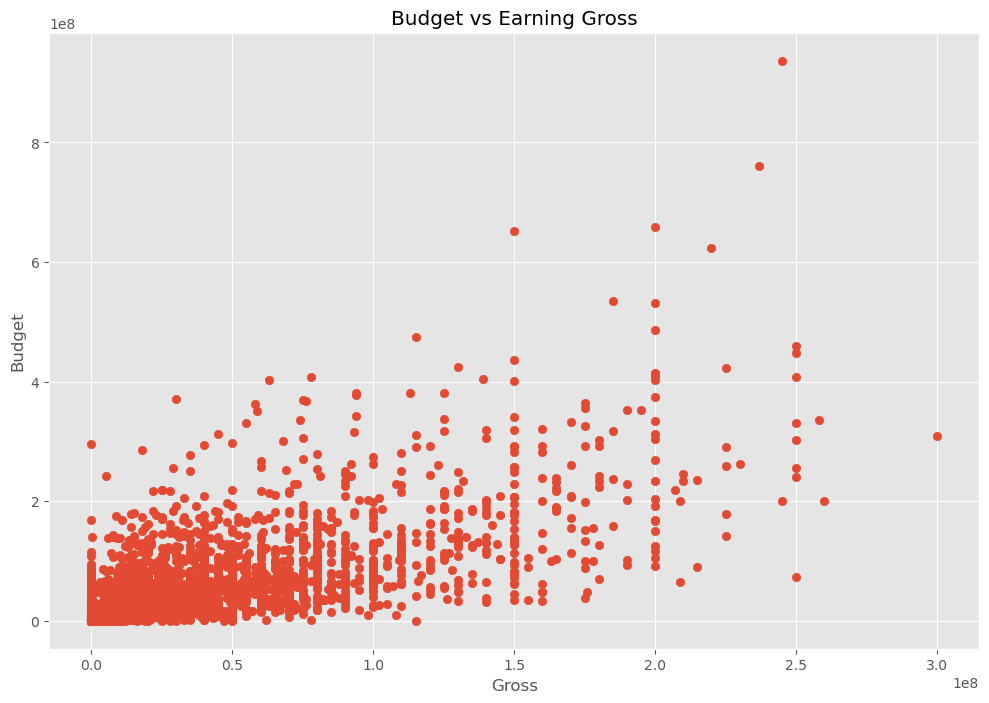

In [44]:
#Scatter budget and gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Earning Gross')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

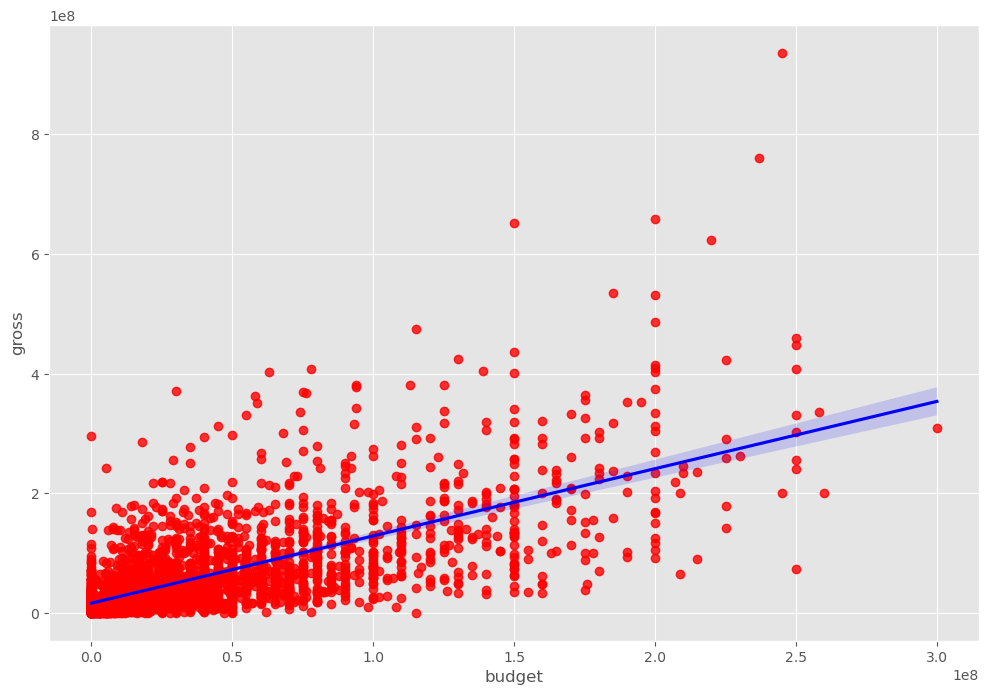

In [62]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})


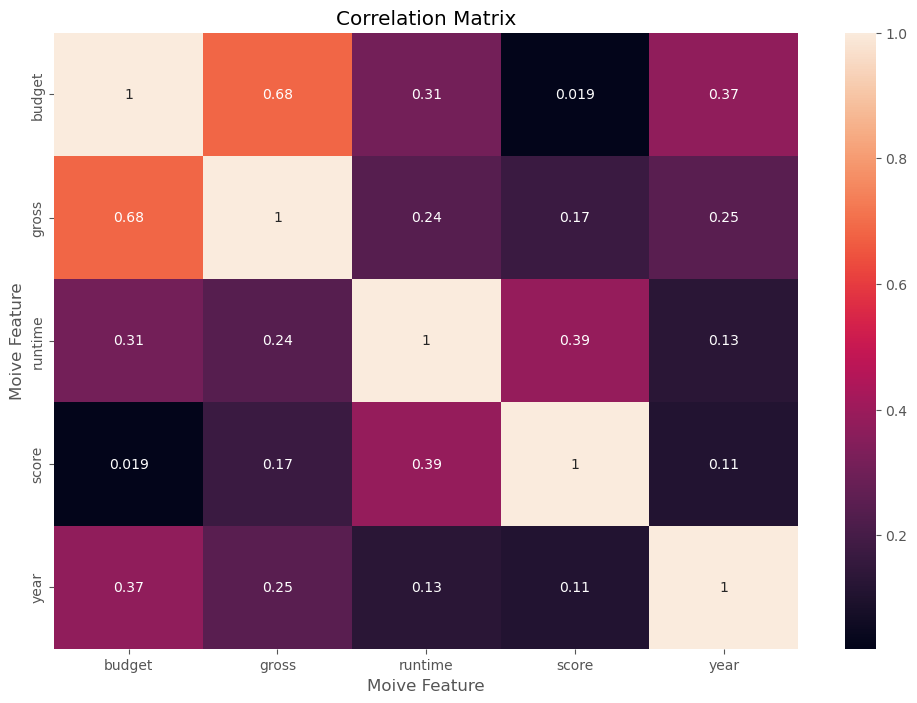

In [65]:
#Looking at high correlation budget and gross
#Pearson,Kendall,spearman
correlation_matrix=df.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Moive Feature')
plt.ylabel('Moive Feature')

plt.show()

In [67]:
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,256,37,1018,1,52287414,2133,6,1213,89,8.1,1150,1722,1986
1,15000000,668,37,1244,0,179800601,2861,4,847,110,6.9,1098,874,1986
2,18500000,837,37,478,0,85160248,133,6,970,137,8.4,1039,768,1986
3,6000000,668,37,597,4,70136369,827,5,561,103,7.8,767,928,1986
4,9000000,668,37,449,4,40471663,1777,5,1543,96,6.8,824,928,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,425,36,127,3,15425870,2513,6,690,127,7.0,150,542,2016
3096,27500000,565,37,224,4,35537564,640,6,1179,102,6.0,945,944,2016
3097,70000000,709,37,873,2,72655779,2166,4,1280,87,6.8,52,1362,2016
3098,50000000,632,37,988,0,127440871,441,5,907,107,6.3,315,727,2016


In [68]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,256,37,1018,1,52287414,2133,6,1213,89,8.1,1150,1722,1986
1,15000000,668,37,1244,0,179800601,2861,4,847,110,6.9,1098,874,1986
2,18500000,837,37,478,0,85160248,133,6,970,137,8.4,1039,768,1986
3,6000000,668,37,597,4,70136369,827,5,561,103,7.8,767,928,1986
4,9000000,668,37,449,4,40471663,1777,5,1543,96,6.8,824,928,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,425,36,127,3,15425870,2513,6,690,127,7.0,150,542,2016
3096,27500000,565,37,224,4,35537564,640,6,1179,102,6.0,945,944,2016
3097,70000000,709,37,873,2,72655779,2166,4,1280,87,6.8,52,1362,2016
3098,50000000,632,37,988,0,127440871,441,5,907,107,6.3,315,727,2016


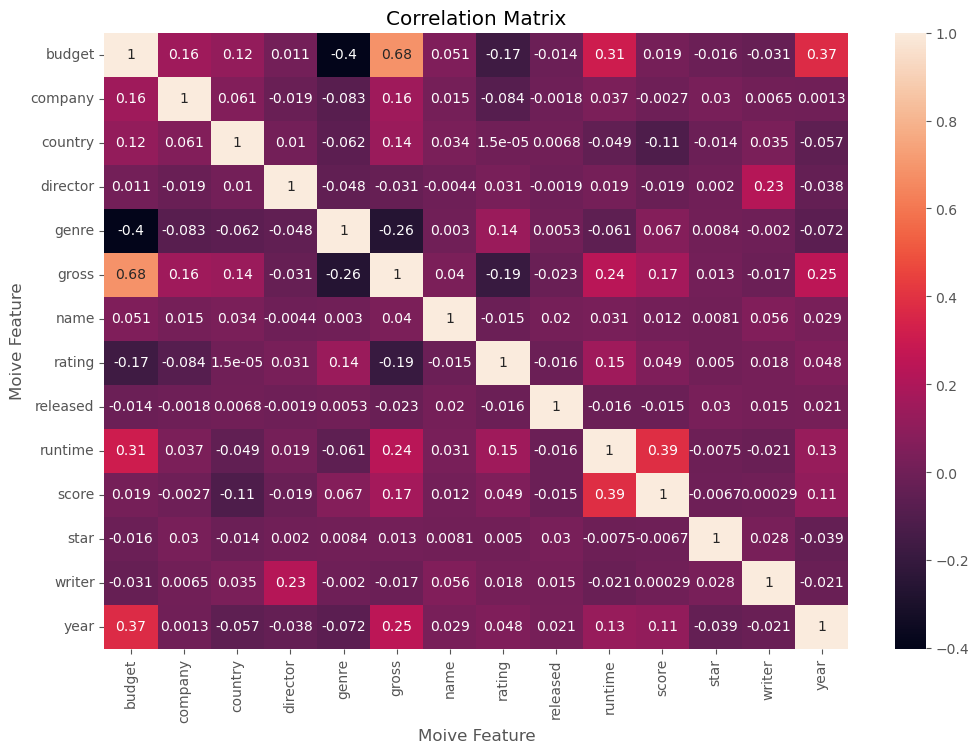

In [69]:
correlation_matrix=df_numerized.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Moive Feature')
plt.ylabel('Moive Feature')

plt.show()

In [70]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
budget,1.000000,0.157131,0.118863,0.011052,-0.401052,0.682588,0.051049,-0.171070,-0.013857,0.309652,0.019061,-0.016357,-0.031269,0.374904
company,0.157131,1.000000,0.061081,-0.018741,-0.083089,0.156048,0.014972,-0.083640,-0.001774,0.037489,-0.002715,0.030033,0.006512,0.001274
country,0.118863,0.061081,1.000000,0.010291,-0.062478,0.138064,0.034133,0.000015,0.006826,-0.049398,-0.113568,-0.014146,0.035367,-0.057044
director,0.011052,-0.018741,0.010291,1.000000,-0.048337,-0.031221,-0.004434,0.030589,-0.001939,0.018846,-0.018591,0.001973,0.227905,-0.037946
genre,-0.401052,-0.083089,-0.062478,-0.048337,1.000000,-0.263051,0.002989,0.136055,0.005326,-0.061327,0.067234,0.008380,-0.001986,-0.072299
gross,0.682588,0.156048,0.138064,-0.031221,-0.263051,1.000000,0.039578,-0.191666,-0.022820,0.238183,0.171825,0.013428,-0.017184,0.246975
name,0.051049,0.014972,0.034133,-0.004434,0.002989,0.039578,1.000000,-0.014934,0.019840,0.031283,0.011649,0.008144,0.055729,0.028571
rating,-0.171070,-0.083640,0.000015,0.030589,0.136055,-0.191666,-0.014934,1.000000,-0.016201,0.153396,0.048781,0.004985,0.017506,0.048356
released,-0.013857,-0.001774,0.006826,-0.001939,0.005326,-0.022820,0.019840,-0.016201,1.000000,-0.015905,-0.014875,0.029677,0.015061,0.021493
runtime,0.309652,0.037489,-0.049398,0.018846,-0.061327,0.238183,0.031283,0.153396,-0.015905,1.000000,0.386864,-0.007494,-0.020986,0.127864


In [74]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

budget    budget      1.000000
          company     0.157131
          country     0.118863
          director    0.011052
          genre      -0.401052
          gross       0.682588
          name        0.051049
          rating     -0.171070
          released   -0.013857
          runtime     0.309652
          score       0.019061
          star       -0.016357
          writer     -0.031269
          year        0.374904
company   budget      0.157131
          company     1.000000
          country     0.061081
          director   -0.018741
          genre      -0.083089
          gross       0.156048
          name        0.014972
          rating     -0.083640
          released   -0.001774
          runtime     0.037489
          score      -0.002715
          star        0.030033
          writer      0.006512
          year        0.001274
country   budget      0.118863
          company     0.061081
          country     1.000000
          director    0.010291
        

In [73]:
pd.set_option('display.max_rows',None)

In [76]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.401052
genre     budget     -0.401052
gross     genre      -0.263051
genre     gross      -0.263051
rating    gross      -0.191666
gross     rating     -0.191666
budget    rating     -0.171070
rating    budget     -0.171070
country   score      -0.113568
score     country    -0.113568
company   rating     -0.083640
rating    company    -0.083640
company   genre      -0.083089
genre     company    -0.083089
year      genre      -0.072299
genre     year       -0.072299
country   genre      -0.062478
genre     country    -0.062478
          runtime    -0.061327
runtime   genre      -0.061327
year      country    -0.057044
country   year       -0.057044
          runtime    -0.049398
runtime   country    -0.049398
director  genre      -0.048337
genre     director   -0.048337
star      year       -0.039222
year      star       -0.039222
          director   -0.037946
director  year       -0.037946
writer    budget     -0.031269
budget    writer     -0.031269
director

In [77]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]

high_corr

budget    gross       0.682588
gross     budget      0.682588
budget    budget      1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
rating    rating      1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64